#Restaurant Data Analysis and Visualization
In this notebook, we analyze and visualize restaurant data to gain insights into customer satisfaction, pricing, cuisine types, and more.


# 1. Data Preparation

### 1.1 Import Libraries


In [ ]:
pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 51.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=885606e304c4d3db8d4627a15ded6285cc01a6f576615b262e3ea6624cc55d1c
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestRegressor
sns.set_theme(style="whitegrid")
import warnings
from ydata_profiling import ProfileReport
warnings.simplefilter(action='ignore', category=FutureWarning)

### 1.2 Load Data



In [ ]:
file_url = 'https://drive.google.com/uc?export=download&id=1aBxY1wImg5jLfFRzl-OGcgGPRuhk0kPd'
data = pd.read_csv(file_url, on_bad_lines='skip')
data.rename(columns={'average _delivery_time': 'average_delivery_time'}, inplace=True)
data.head()

restaurant_name  rating  average_price  average_delivery_time  \
0          # Momo     4.2            200                     34   
1             #99     4.1            100                     31   
2            #BBQ     3.6            200                     57   
3    #Dilliwaala6     3.7            100                     38   
4        #FlyFree     4.0            200                     26   

   south_indian_or_not  north_indian_or_not  fast_food_or_not  street_food  \
0                    0                    0                 0            0   
1                    0                    0                 0            0   
2                    0                    0                 1            0   
3                    0                    1                 0            1   
4                    0                    0                 1            0   

   biryani_or_not  bakery_or_not    location  
0               0              0    Durgapur  
1               0              0    Bareilly  
2               0              0   Mangalore  
3               0              0  Puducherry  
4               0              0       Ajmer

###1.3 Get summary info on columns, data types


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27656 entries, 0 to 27655
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restaurant_name        27656 non-null  object 
 1   rating                 27656 non-null  float64
 2   average_price          27656 non-null  int64  
 3   average_delivery_time  27656 non-null  int64  
 4   south_indian_or_not    27656 non-null  int64  
 5   north_indian_or_not    27656 non-null  int64  
 6   fast_food_or_not       27656 non-null  int64  
 7   street_food            27656 non-null  int64  
 8   biryani_or_not         27656 non-null  int64  
 9   bakery_or_not          27656 non-null  int64  
 10  location               27656 non-null  object 
dtypes: float64(1), int64(8), object(2)
memory usage: 2.3+ MB
None


####Observations


**Dataset  structure :**

**Total entries:** 27,656 rows.

**Data columns:** 11 features.

**restaurant_name** and **location** are text data (object type).

**rating** is a float64, indicating that ratings might be fractional

**average_price** and **average_delivery_time** are integers (int64), representing the cost and delivery time in minutes.

**Cuisine type flags:** Columns such as south_indian_or_not, north_indian_or_not, etc., are binary (int64), indicating whether the restaurant serves a particular type of cuisine (0 for no, 1 for yes).


**Feature Types**

**restaurant_name:** Categorical - Represents the name of each restaurant.

**rating:** Continuous - A numerical variable that indicates the restaurant's rating , and it can take any real value within a range,  between 0 and 5.

**average_price:** Continuous - The average price for a meal, represented as an integer.

**average_delivery_time:**Continuous - The average delivery time in minutes, also represented as an integer.

**south_indian_or_not:** Binary - Indicates if the restaurant serves South Indian cuisine (0 = No, 1 = Yes).

**north_indian_or_not:** Binary - Indicates if the restaurant serves North Indian cuisine (0 = No, 1 = Yes).

**fast_food_or_not:** Binary - Indicates if the restaurant serves Fast Food (0 = No, 1 = Yes).

**street_food:** Binary - Indicates if the restaurant serves Street Food (0 = No, 1 = Yes).

**biryani_or_not:** Binary - Indicates if the restaurant serves Biryani (0 = No, 1 = Yes).

**bakery_or_not:** Binary - Indicates if the restaurant serves Bakery items (0 = No, 1 = Yes).

**location:** Categorical - Represents the location of the restaurant (e.g., Durgapur, Bareilly).

###1.4 Check for Missing Values and Data Types

In [ ]:
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 restaurant_name          0
rating                   0
average_price            0
average_delivery_time    0
south_indian_or_not      0
north_indian_or_not      0
fast_food_or_not         0
street_food              0
biryani_or_not           0
bakery_or_not            0
location                 0
dtype: int64


####Observations

There are no missing values in the dataset, which seems to be well-maintained. Now that we don't have to deal with missing data, which is an excellent place to start, we may move on to other stages of our analysis or machine learning pipeline.

### 1.5 Remove Duplicate Rows

In [ ]:
print("Before removing duplicates:", data.shape)
data = data.drop_duplicates()
print("After removing duplicates:", data.shape)

Before removing duplicates: (27656, 11)
After removing duplicates: (27656, 11)


####Observations

Before and after calling drop_duplicates(), the dataset still has 27656 entries. This suggests that no duplicate rows were present in the dataset to begin with. The number of rows remained unchanged, indicating that all entries were unique.



### 1.6 Scaling Numerical Columns

In [ ]:
scaler = StandardScaler()
data[['average_price_scaled', 'average_delivery_time_scaled']] = scaler.fit_transform(data[['average_price', 'average_delivery_time']])
data[['average_price_scaled', 'average_delivery_time_scaled']].head()


average_price_scaled  average_delivery_time_scaled
0              0.301342                      0.063101
1             -0.851961                     -0.233554
2              0.301342                      2.337461
3             -0.851961                      0.458642
4              0.301342                     -0.727980

In [ ]:
data['average_price_scaled'].describe()

count    2.765600e+04
mean     1.325716e-16
std      1.000018e+00
min     -1.889934e+00
25%     -8.519611e-01
50%     -2.753098e-01
75%      3.013416e-01
max      7.221158e+00
Name: average_price_scaled, dtype: float64

####Observations
After applying StandardScaler values for **average_price**	& **average_delivery_time** both columns are now centered around 0, and their spread is standardized to have a standard deviation of 1. This can help improve the performance of machine learning models that depend on the scale of input features


Without scaling, larger-range features could disproportionately impact model performance, making the model more sensitive to those features and also aids model performance

##1.7 Feature Engineering



###1.7.1 Average Rating by Location

In [ ]:
# Group by location and compute statistics
city_stats = data.groupby('location').agg({
    'average_price': ['mean', 'median', 'count'],
    'rating': ['mean', 'std']
}).reset_index()
city_stats.columns = ['City', 'Average Price', 'Median Price', 'Count', 'Average Satisfaction', 'Satisfaction Std Dev']
city_stats.head()

City  Average Price  Median Price  Count  Average Satisfaction  \
0       Agra     169.875000         150.0    400              3.861000   
1  Ahmedabad     170.643154         150.0    482              3.991909   
2      Ajmer     165.137615         150.0    218              3.869725   
3  Alappuzha     187.931034         150.0     29              4.034483   
4    Aligarh     175.641026         150.0    156              3.851923   

   Satisfaction Std Dev  
0              0.360630  
1              0.299336  
2              0.381968  
3              0.347723  
4              0.338587

###1.7.2 Target Encoding for Location

In [ ]:
location_avg_price = data.groupby('location')['average_price'].mean()
data['location_encoded'] = data['location'].map(location_avg_price)

###Observations

**Feature Encoding:**
This approach  converts a categorical feature (like location) into a numerical feature by associating it with a statistic (in this case, the mean average_price).


**Capturing Location-Price Relationship:**
It helps the model capture the relationship between the location and the average price, rather than treating the location as an arbitrary categorical variable.

This can improve the predictive performance of machine learning models when location affects pricing behavior

# 2. Exploratory Data Analysis (EDA)

##2.1 Descriptive Statistics


In [ ]:
print(data.describe())

             rating  average_price  average_delivery_time  \
count  27656.000000   27656.000000           27656.000000   
mean       3.920643     173.871420              33.361874   
std        0.348943      86.709068              10.112919   
min        2.400000      10.000000               6.000000   
25%        3.700000     100.000000              26.000000   
50%        4.000000     150.000000              32.000000   
75%        4.200000     200.000000              40.000000   
max        4.900000     800.000000             190.000000   

       south_indian_or_not  north_indian_or_not  fast_food_or_not  \
count         27656.000000         27656.000000      27656.000000   
mean              0.129990             0.418499          0.363610   
std               0.336298             0.493322          0.481047   
min               0.000000             0.000000          0.000000   
25%               0.000000             0.000000          0.000000   
50%               0.000000          

####Observations


**Interpretation of each feature:**

**rating**

Count: 27,656 ratings are available.

Mean: The average rating is 3.92, indicating that most restaurants have fairly good ratings.

Std (Standard Deviation): 0.35, showing that ratings don’t vary greatly around the mean.

Min/Max: Ratings range from 2.4 to 4.9.

25%, 50%, 75%: 25% of ratings are below 3.7, 50% (median) are 4.0, and 75% are above 4.2.

**average_price**

Mean: The average price is around 174.

Std: 86.71, indicating a significant variation in average prices across restaurants.

Min/Max: Prices range from 10 to 800, suggesting a wide range of dining options.

25%, 50%, 75%: 25% of restaurants have an average price below 100, 50% are at or below 150, and 75% are below 200.

**average_delivery_time**

Mean: The average delivery time is about 33 minutes.

Std: 10.11, suggesting that delivery times vary moderately.

Min/Max: Delivery times range from 6 to 190 minutes, with some extreme outliers likely affecting the maximum.

25%, 50%, 75%: 25% of deliveries are 26 minutes or less, 50% are 32 minutes, and 75% are 40 minutes or less.

**south_indian_or_not**

Mean: The mean is 0.13, meaning about 13% of restaurants serve South Indian cuisine.

Std: 0.34, showing low variability due to the binary nature (0 or 1).

Min/Max: Min of 0 and max of 1, as expected for binary features.

Percentiles: 75% of the values are 0, indicating South Indian cuisine is relatively less common.

**north_indian_or_not**

Mean: About 42% of restaurants serve North Indian cuisine.

Std: 0.49, indicating a higher spread due to the larger proportion of 1s.

North Indian cuisine is more common than South Indian.

**fast_food_or_not**

Mean: About 36% of restaurants serve fast food.

This is moderately popular compared to other cuisine types.

**street_food**

Mean: About 18% of restaurants serve street food.

Street food is less common, as most values are 0.

**biryani_or_not**

Mean: About 18% of restaurants offer biryani.

The distribution is similar to street food, with 75% having a value of 0.

**bakery_or_not**

Mean: About 10% of restaurants serve bakery items.

This is the least common cuisine type, with the majority of values at 0.


**Summary:**  North Indian cuisine is the most popular, while Bakery is the least common. Delivery times, on average, seems to be  reasonable, but there is a broad range in prices and ratings across the dataset.



## 2.2 Univariate Analysis




###2.2.1 Distribution of Rating

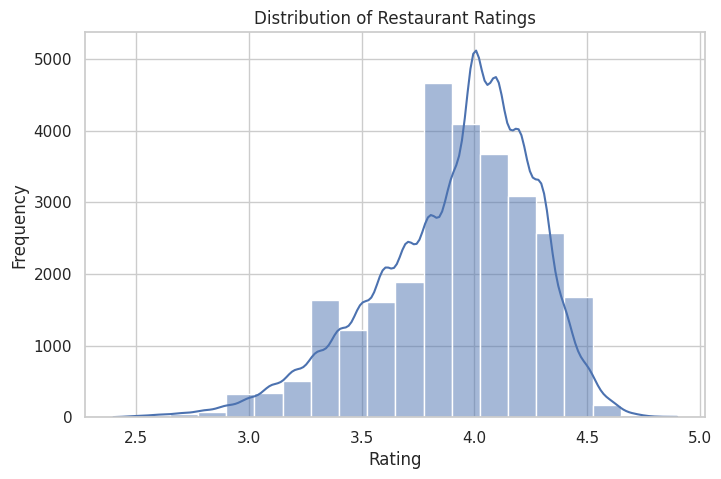

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['rating'], bins=20, kde=True)
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

####Insights
The ratings appear to be positively skewed, as the mean (3.92) is slightly lower than the median (4.0), indicating that there are a few lower-rated restaurants pulling the average down.

The low standard deviation (0.35) suggests that there isn’t much variation in the ratings—most restaurants are clustered around the mean with relatively few extreme values.

The range (2.4 to 4.9) tells us that the majority of ratings fall within a fairly narrow range, with 2.4 being a rare low outlier, and 4.9 being a very high outlier, indicating that a small number of restaurants receive either very low or very high ratings.

###2.2.2 Distribution of average_price

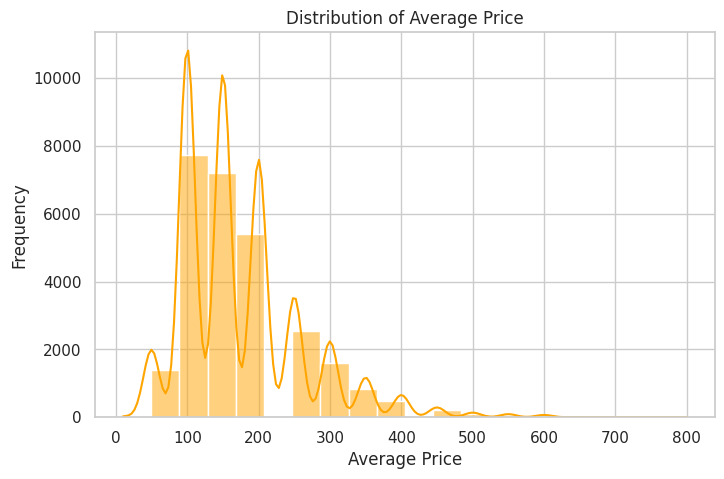

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['average_price'], bins=20, kde=True, color='orange')
plt.title("Distribution of Average Price")
plt.xlabel("Average Price")
plt.ylabel("Frequency")
plt.show()

#### Insights
The average price of 174 is relatively high compared to the first quartile (100) and median (150), suggesting that the dataset is skewed to the right (positively skewed). This indicates that there are several restaurants with low prices, but a few high-priced restaurants (with prices reaching up to 800) are pushing the average up.

The standard deviation (86.71) confirms the wide variation in the data, meaning there are many restaurants that charge much less than the average, but a few expensive ones elevate the overall mean.

The range from 10 to 800 is quite broad, reflecting the presence of both budget-friendly and luxury restaurants in the dataset. This could also suggest that the dataset includes various types of dining establishments, such as fast food, casual dining, and fine-dining options.

The percentiles (100, 150, 200) reveal that:

A quarter of the restaurants are very affordable (below 100),
Half of the restaurants are priced at 150 or less,
Three-quarters of the restaurants are below 200, meaning most restaurants are relatively affordable, though there are some higher-priced options.

###2.2.3 Distribution of average_delivery_time

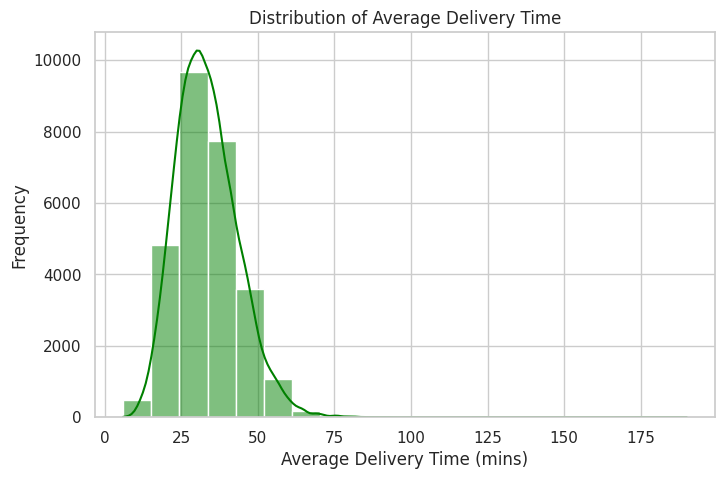

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['average_delivery_time'], bins=20, kde=True, color='green')
plt.title("Distribution of Average Delivery Time")
plt.xlabel("Average Delivery Time (mins)")
plt.ylabel("Frequency")
plt.show()

#### Insights
The mean delivery time of 33 minutes being slightly above the median of 32 minutes suggests that the data might be slightly right-skewed, with a few restaurants taking much longer to deliver, thus pulling the average higher.

The standard deviation of 10.11 minutes suggests that delivery times vary moderately, with some restaurants offering quicker delivery while others are much slower, but not excessively so.

The range from 6 to 190 minutes shows that while most restaurants fall within a reasonable delivery time of 26 to 40 minutes, there are extreme outliers (up to 190 minutes) that skew the maximum. These outliers may need further investigation.

###2.2.4 Location Counts

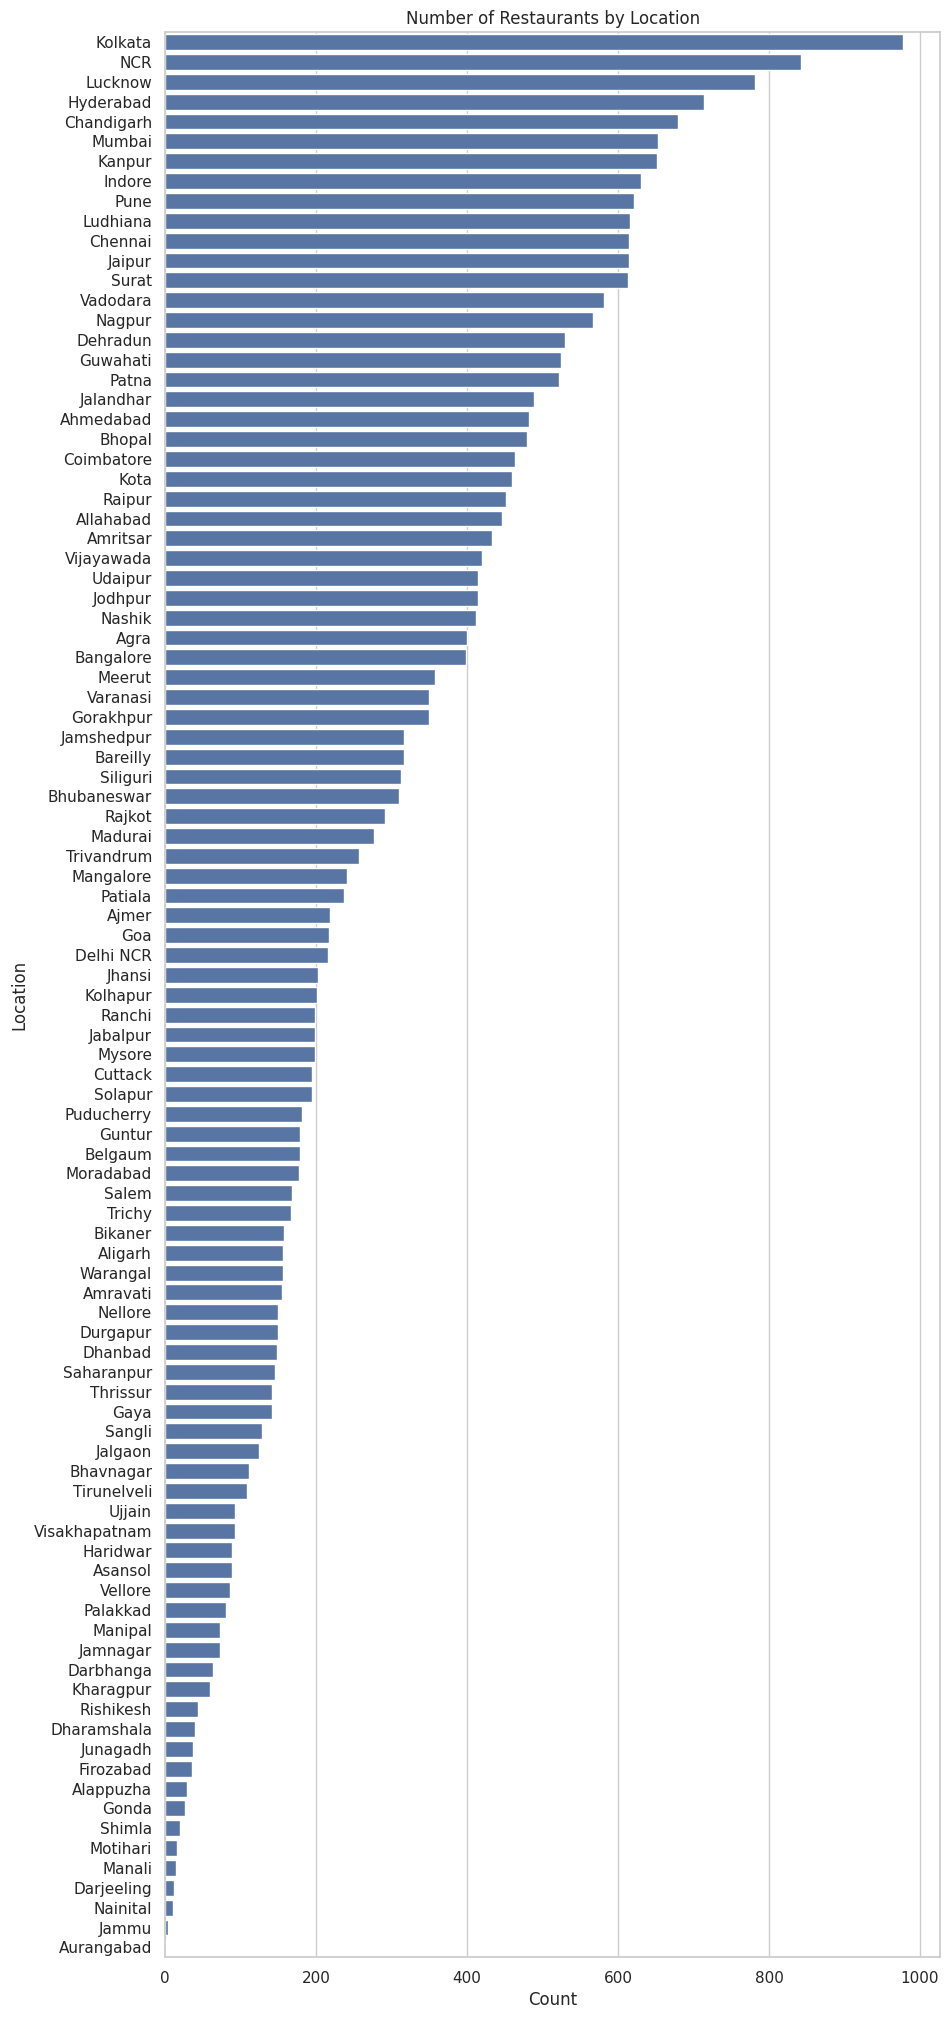

In [ ]:
plt.figure(figsize=(10, 25))
sns.countplot(y='location', data=data, order=data['location'].value_counts().index)
plt.title("Number of Restaurants by Location")
plt.xlabel("Count")
plt.ylabel("Location")
plt.show()

####Obervations

The location wise count reveals that most of the restuarants is located in Kolkata.

###2.2.5 Cuisine Type Classification

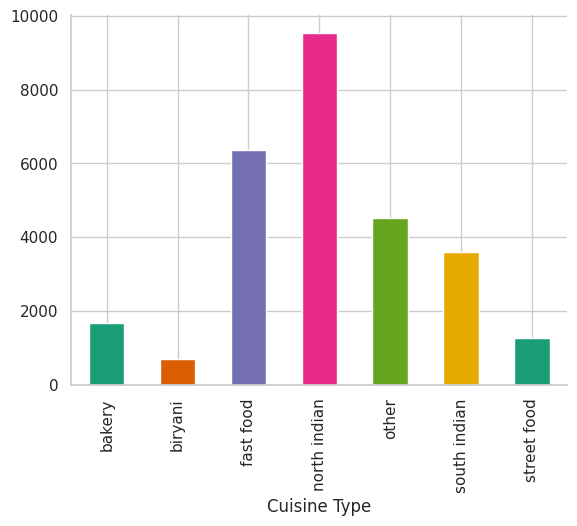

In [ ]:
def get_cuisine(row):
    if row['south_indian_or_not'] == 1:
        return 'south indian'
    elif row['north_indian_or_not'] == 1:
        return 'north indian'
    elif row['fast_food_or_not'] == 1:
        return 'fast food'
    elif row['street_food'] == 1:
        return 'street food'
    elif row['biryani_or_not'] == 1:
        return 'biryani'
    elif row['bakery_or_not'] == 1:
        return 'bakery'
    else:
        return 'other'

data['Cuisine Type'] = data.apply(get_cuisine, axis=1)

# Plot the distribution of cuisine types
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Cuisine Type').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)


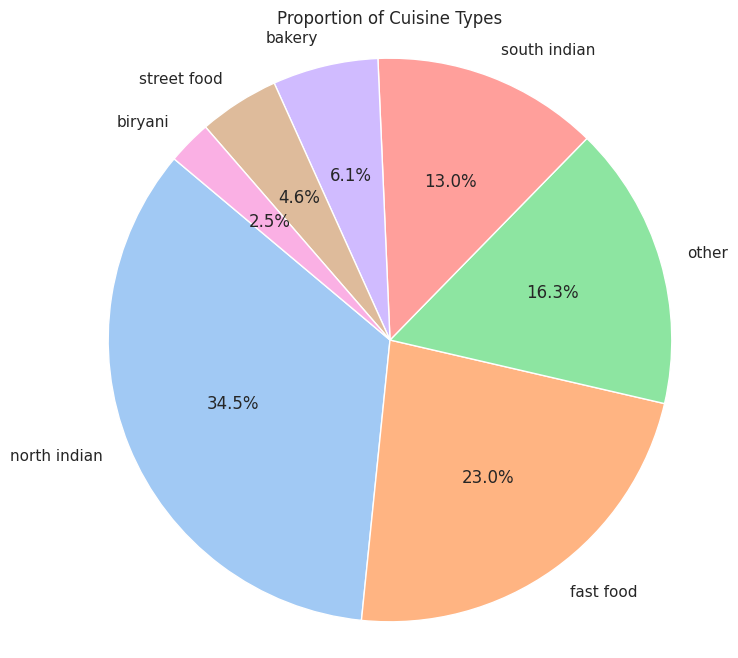

In [ ]:
cuisine_counts = data['Cuisine Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(cuisine_counts, labels=cuisine_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Proportion of Cuisine Types')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


####Observation
The data shows that North Indian cuisine is the most popular, followed by fast food, while bakery and street food have the lowest demand. The "other" category has a notable presence, indicating a variety of less common cuisines. This suggests a strong preference for North Indian and fast food options in the dataset.

###2.2.6 Proportion of Price Categories


In [ ]:
data['average_price'].describe()

count    27656.000000
mean       173.871420
std         86.709068
min         10.000000
25%        100.000000
50%        150.000000
75%        200.000000
max        800.000000
Name: average_price, dtype: float64

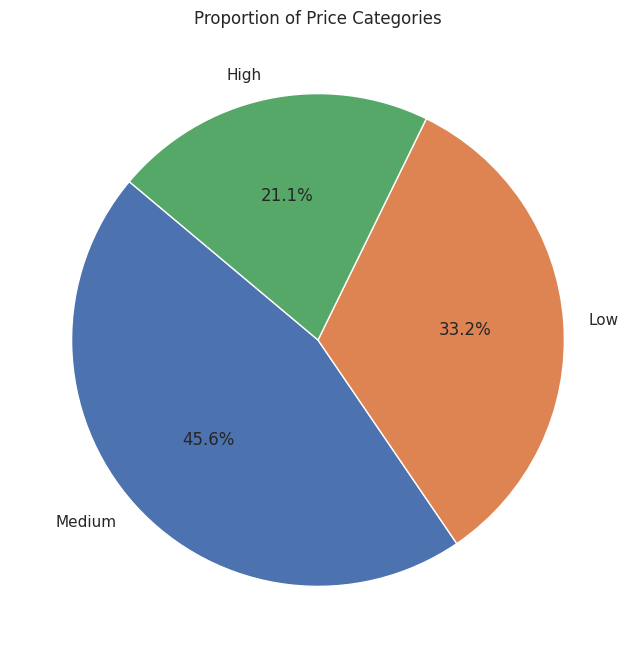

In [ ]:
data['price_category'] = pd.cut(data['average_price'], bins=[0, 100, 200, 800], labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(8, 8))
data['price_category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Price Categories')
plt.ylabel('')
plt.show()


####Observations
The pie chart shows the distribution of price categories as follows:

1.   Medium Price Category Dominates: The majority of items fall in the medium price category, accounting for 45.6% of the total, indicating a preference or concentration in this price range.

2.   Low Price Category is Significant: The low price category makes up 33.2%, suggesting a considerable proportion of budget-friendly options.

3.   High Price Category is Minimal: Only 21.1% of items are in the high price range, indicating fewer premium-priced options in comparison to medium and low categories.

This distribution suggests a strong focus on moderately priced offerings, with limited high-end options.





## 2.3 Outlier Detection

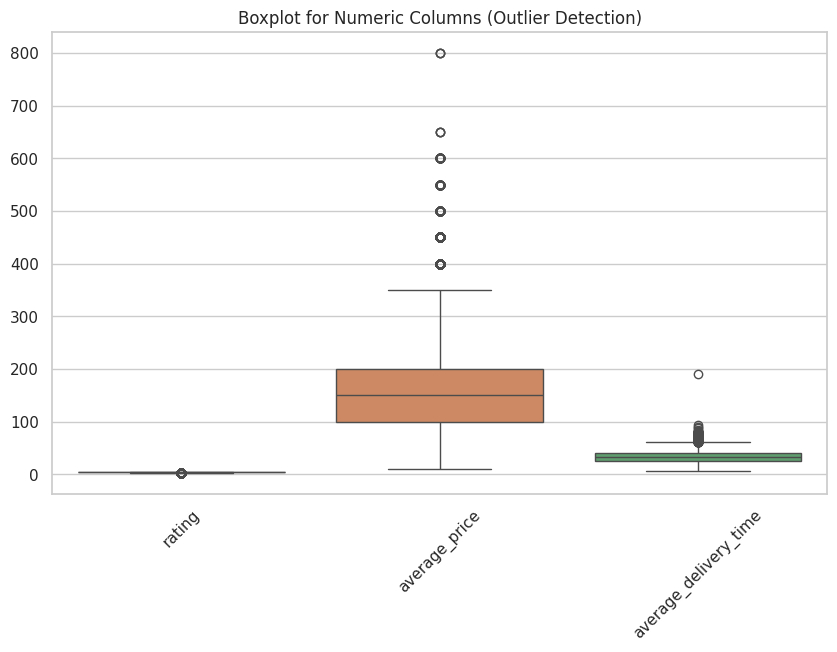

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['rating', 'average_price', 'average_delivery_time']])
plt.title("Boxplot for Numeric Columns (Outlier Detection)")
plt.xticks(rotation=45)
plt.show()

###Remove Outliers

We can use **Z-Score** and **IQR method** to remove outliers

##2.4 Bivariate Analysis

###2.4.1 Average Price vs. Rating

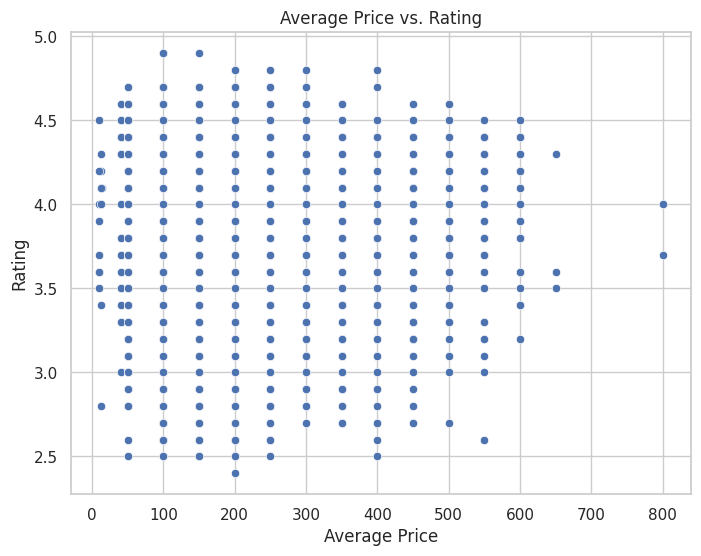

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='average_price', y='rating', data=data)
plt.title("Average Price vs. Rating")
plt.xlabel("Average Price")
plt.ylabel("Rating")
plt.show()

####Observation

The scatter plot shows the relationship between average price and rating:

1. High Ratings Across Price Ranges: Items with high ratings (4.0 and above) are present across a broad range of prices, suggesting that quality (as reflected in ratings) is not solely dependent on price.

2. Concentration in Lower Price Range: There is a higher density of items with average prices below 500, indicating a preference or higher availability in the lower to mid-price range.

3. Sparse High-Price Options: Very few items have an average price above 600, and these items also have mixed ratings, implying that higher prices do not consistently correlate with higher ratings.

Overall, this suggests that customers find satisfactory options across various price points, with most items clustered in a mid-to-low price range.



###2.4.2 Average Rating by Price Category

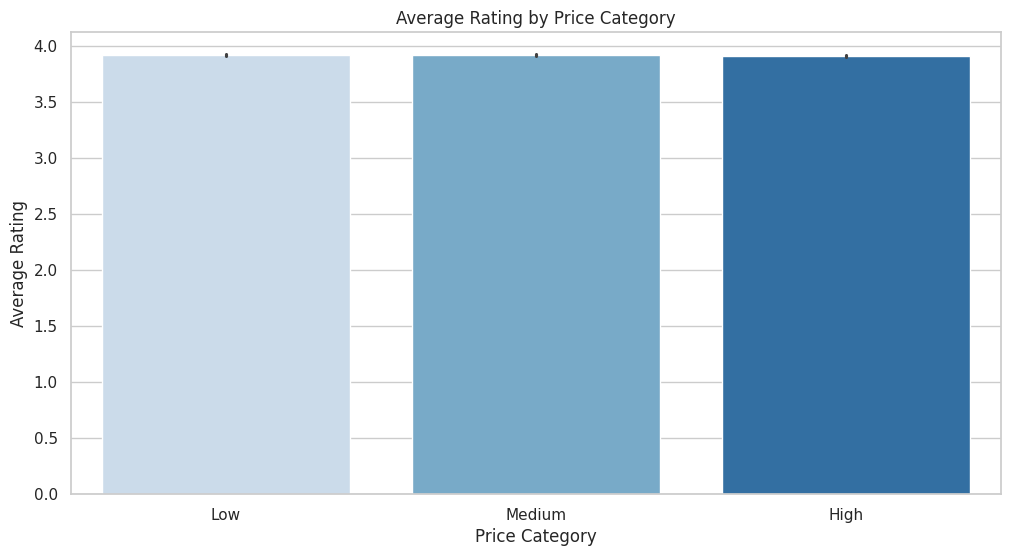

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='price_category', y='rating', data=data, palette='Blues')
plt.title('Average Rating by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Average Rating')
plt.show()


###2.4.3 Delivery Time Distribution Across Price Categories

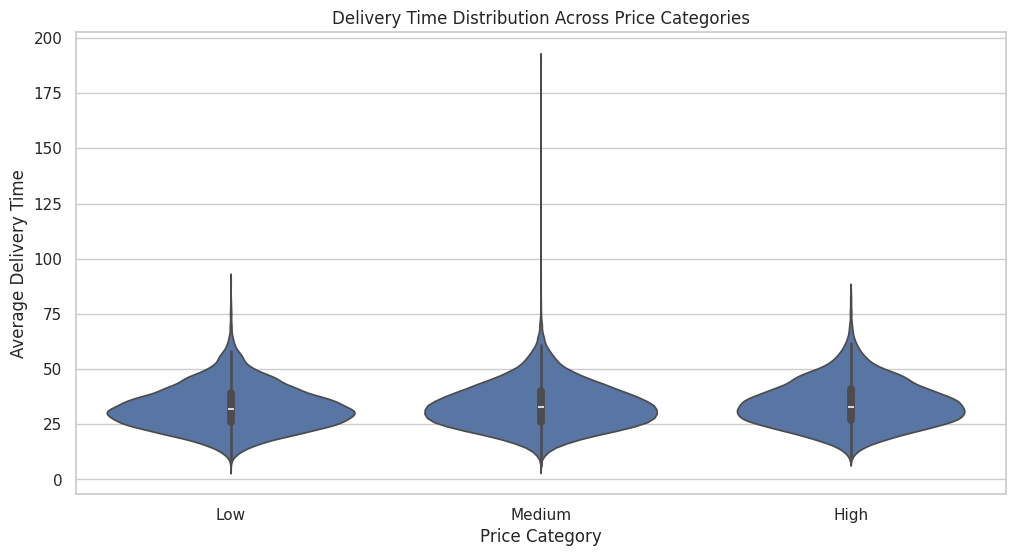

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='price_category', y='average_delivery_time', data=data)
plt.title('Delivery Time Distribution Across Price Categories')
plt.xlabel('Price Category')
plt.ylabel('Average Delivery Time')
plt.show()

####Observations
The violin plot shows the distribution of delivery times across different price categories:

1. Similar Delivery Time Across Price Categories: The distribution of delivery times is relatively consistent across low, medium, and high price categories, indicating that price does not significantly impact delivery speed.

2. Median Delivery Times Around 30-40 Minutes: The median delivery time for all categories hovers around 30 to 40 minutes, suggesting a typical delivery time regardless of price range.

3. Broader Spread in Low and Medium Categories: The low and medium price categories exhibit a broader spread, with occasional outliers reaching up to 100 minutes, whereas the high category has a more compact distribution with fewer extreme values.

This suggests that while delivery time is fairly consistent across price levels, lower-priced items may have slightly more variability in delivery times.

###2.4.4 Delivery Time vs. Rating

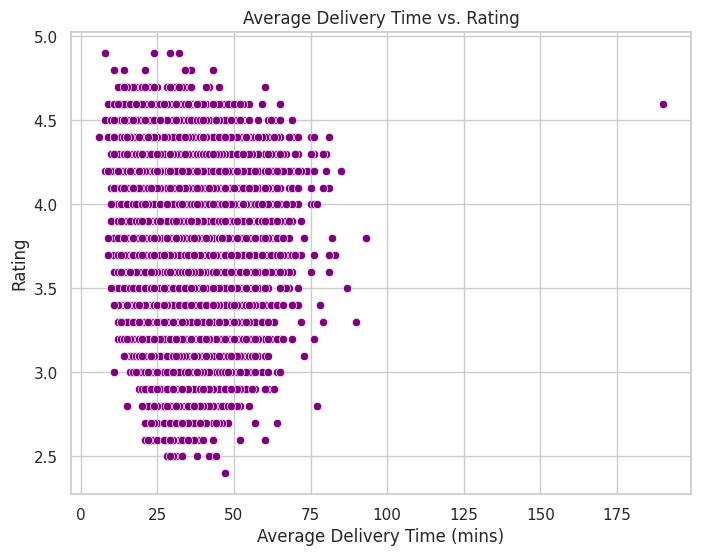

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='average_delivery_time', y='rating', data=data, color='purple')
plt.title("Average Delivery Time vs. Rating")
plt.xlabel("Average Delivery Time (mins)")
plt.ylabel("Rating")
plt.show()

###2.4.5 Average Price vs Average Delivery Time

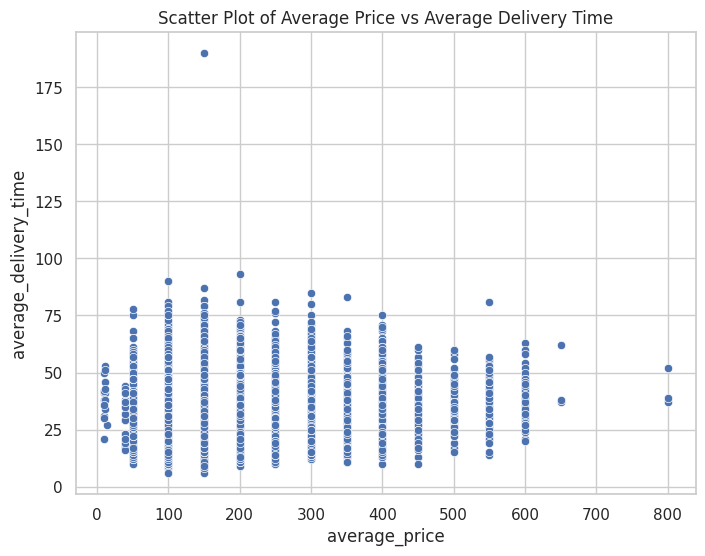

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='average_price', y='average_delivery_time', data=data)
plt.title('Scatter Plot of Average Price vs Average Delivery Time')
plt.show()

###2.4.6 Average Rating by Location


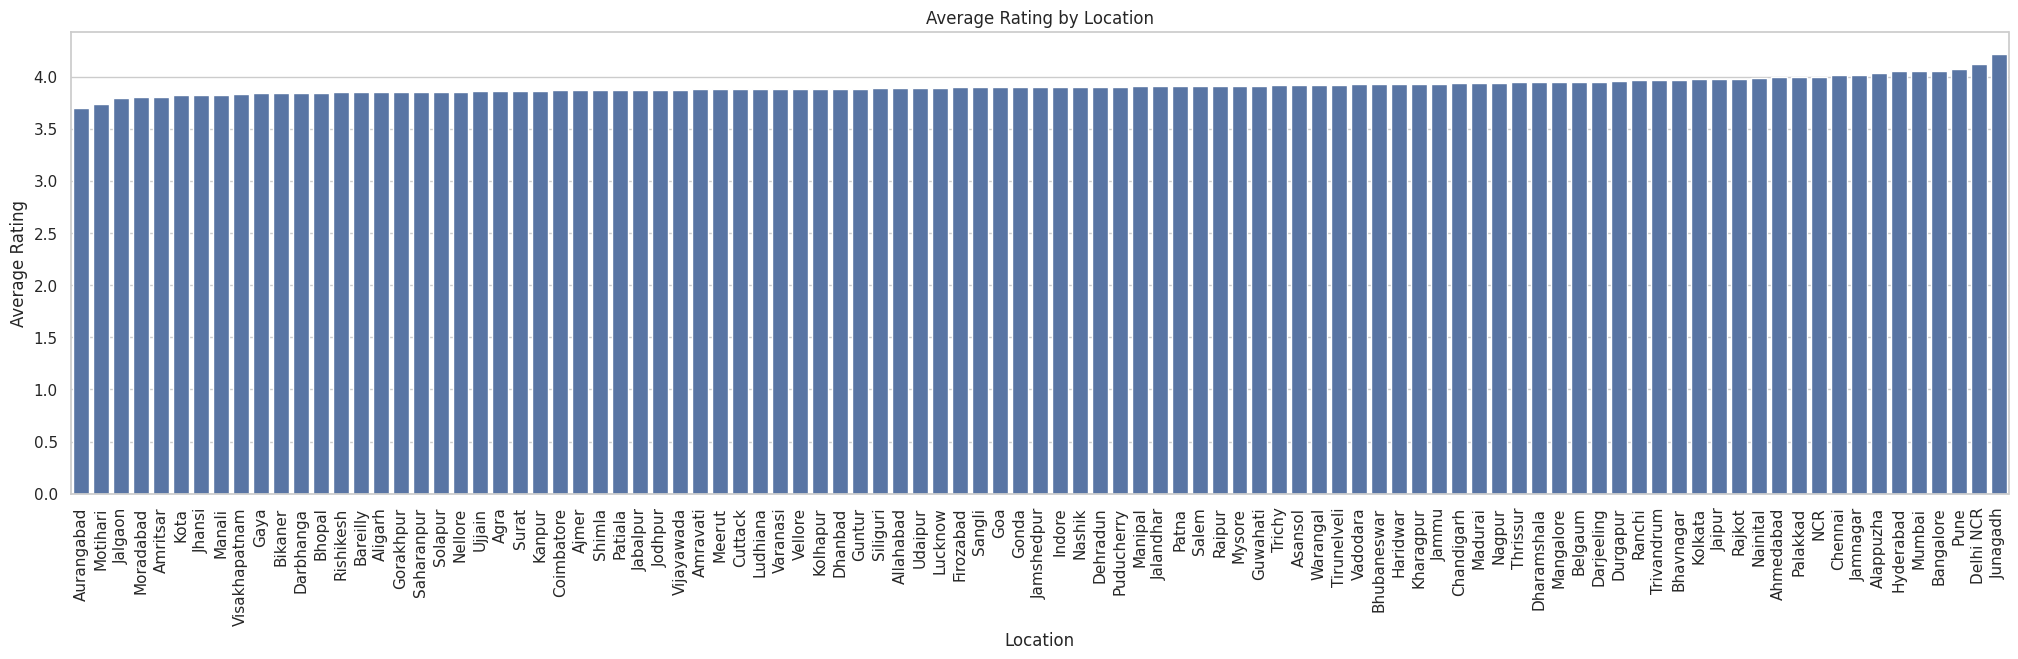

In [ ]:
# For this dataset, we can plot the average rating by location
location_rating = data.groupby('location')['rating'].mean().sort_values()

plt.figure(figsize=(25, 6))
sns.barplot(x=location_rating.index, y=location_rating.values)
plt.xticks(rotation=90)
plt.title("Average Rating by Location")
plt.xlabel("Location")
plt.ylabel("Average Rating")
plt.show()


###2.4.7 Distribution of Rating by Cuisine Type

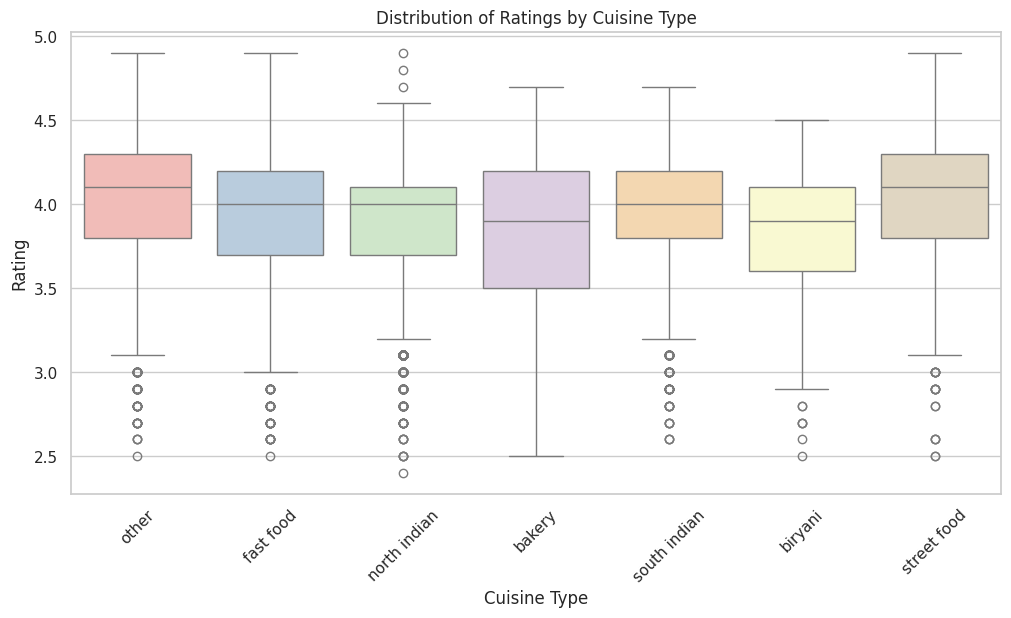

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cuisine Type', y='rating', data=data, palette='Pastel1')
plt.title('Distribution of Ratings by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

###2.4.8 Delivery Time vs Average Price Colored by Cuisine Type

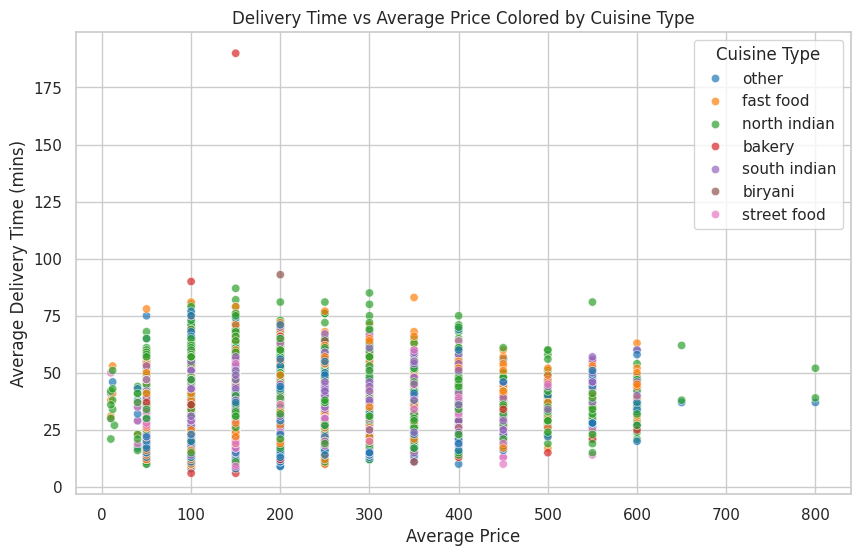

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_price', y='average_delivery_time', hue='Cuisine Type', data=data, palette='tab10', alpha=0.7)
plt.title('Delivery Time vs Average Price Colored by Cuisine Type')
plt.xlabel('Average Price')
plt.ylabel('Average Delivery Time (mins)')
plt.show()


###Observations

The data includes normalized ratings and a popularity score combining rating and delivery time, providing insight into restaurant performance. The scatter plot shows that delivery times are consistent across price ranges, with no clear link between higher prices and faster delivery. Cuisine types are distributed across various price points, with a few outliers in delivery time, especially in fast food and "other" categories, indicating occasional delays.

##2.5 Correlation Analysis and Heatmap

Pearson Correlation Matrix:
                                rating  average_price  average_delivery_time  \
rating                        1.000000      -0.005493              -0.101064   
average_price                -0.005493       1.000000               0.062707   
average_delivery_time        -0.101064       0.062707               1.000000   
south_indian_or_not           0.028530      -0.012844              -0.024422   
north_indian_or_not          -0.059976       0.023960               0.104405   
fast_food_or_not             -0.036920      -0.016746               0.071200   
street_food                  -0.002446      -0.027984              -0.022701   
biryani_or_not               -0.053010       0.024887               0.033268   
bakery_or_not                -0.048491      -0.005252              -0.075069   
average_price_scaled         -0.005493       1.000000               0.062707   
average_delivery_time_scaled -0.101064       0.062707               1.000000   
location_enc

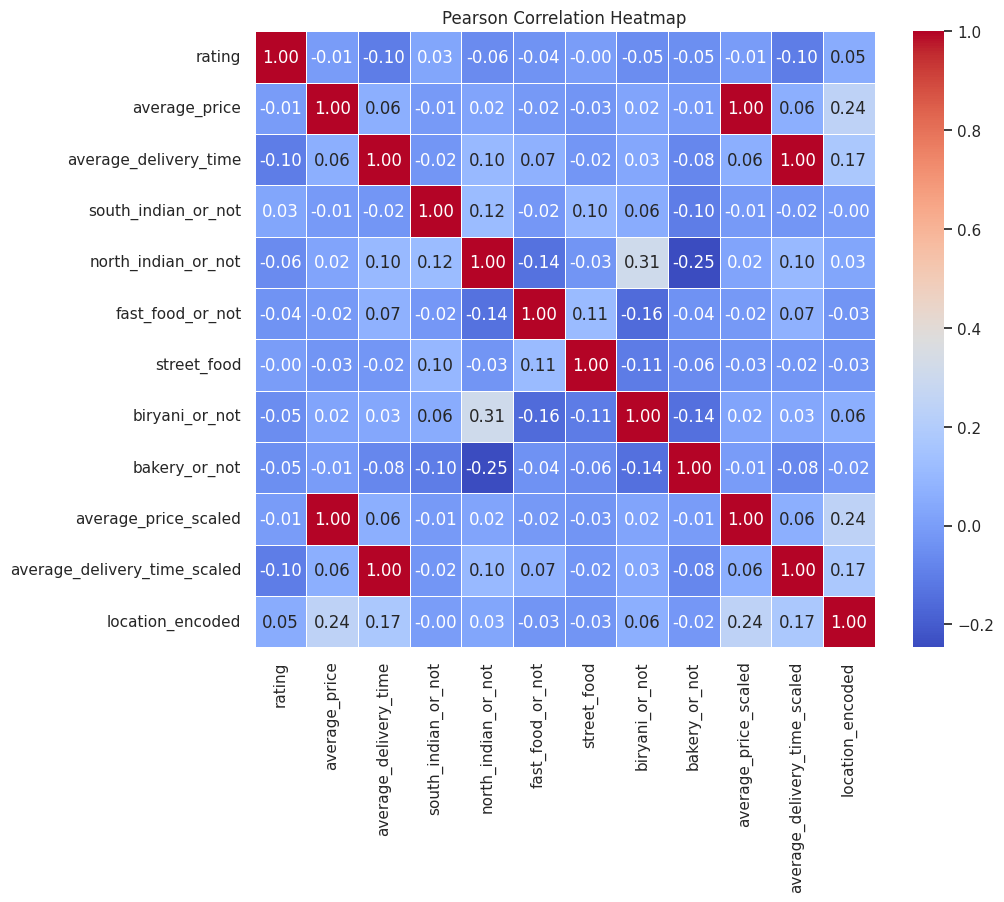

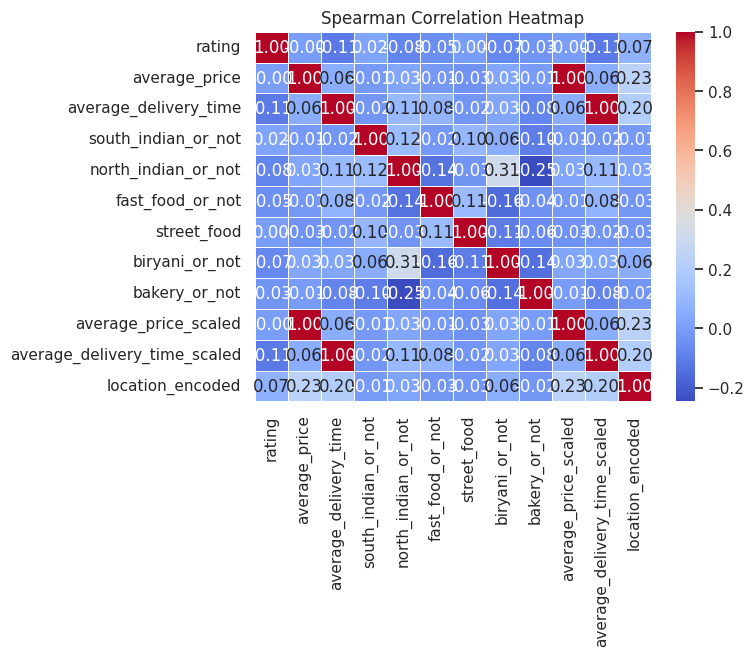

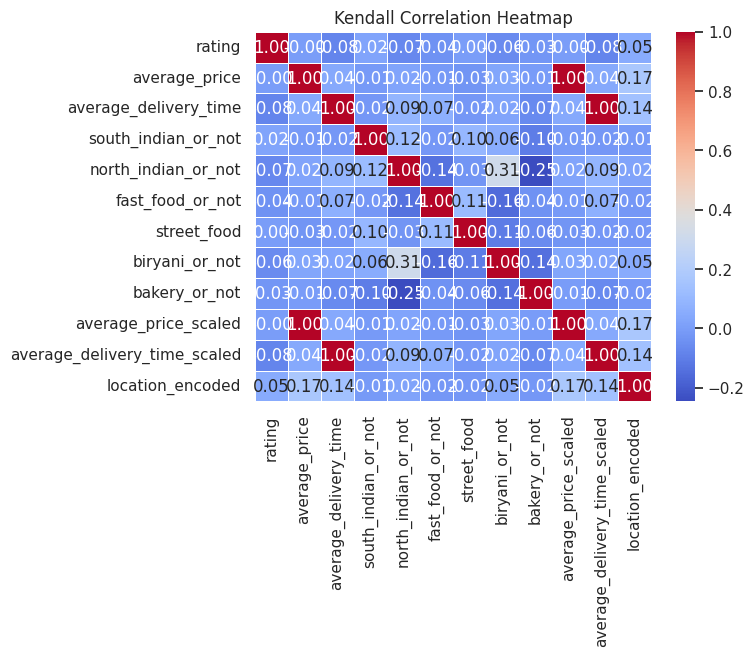

In [ ]:
# 1. Select only numeric columns (exclude string/categorical columns)
numeric_data = data.select_dtypes(include=[float, int])

# 2. Pearson Correlation (default method in pandas .corr())
correlation_pearson = numeric_data.corr(method='pearson')

# 3. Spearman Correlation
correlation_spearman = numeric_data.corr(method='spearman')

# 4. Kendall Correlation
correlation_kendall = numeric_data.corr(method='kendall')

# Print Correlation Matrices
print("Pearson Correlation Matrix:")
print(correlation_pearson)

print("\nSpearman Correlation Matrix:")
print(correlation_spearman)

print("\nKendall Correlation Matrix:")
print(correlation_kendall)

# 5. Visualizing Correlation using Heatmap (Pearson Correlation)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_pearson, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

#Optionally, we can also visualize the Spearman and Kendall heatmaps similarly:
#Visualize Spearman
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Spearman Correlation Heatmap')
plt.show()

#Visualize Kendall
sns.heatmap(correlation_kendall, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Kendall Correlation Heatmap')
plt.show()


####Observations

The  correlations suggest that while there are some slight relationships between different variables (such as location and price), most of the factors are weakly correlated



**Key Insights:**
Price and Rating: No strong relationship between price and rating, implying customers do not base their ratings on price alone.

Cuisine Types: The different cuisine types (ex South Indian, Fast Food, Biryani) seem relatively independent of ratings and prices, except for minor correlations between cuisine offerings.

Location: Locations seem to have a moderate effect on the average price of restaurants but a weaker effect on other factors like delivery time or rating.

Delivery Time: Delivery time has a weak relationship with other
variables, suggesting that it may be influenced by location or restaurant size, but the effect is minimal in terms of price and ratings.

## 2.6 Multivariate Analysis

### 2.6.1 Pair Plot

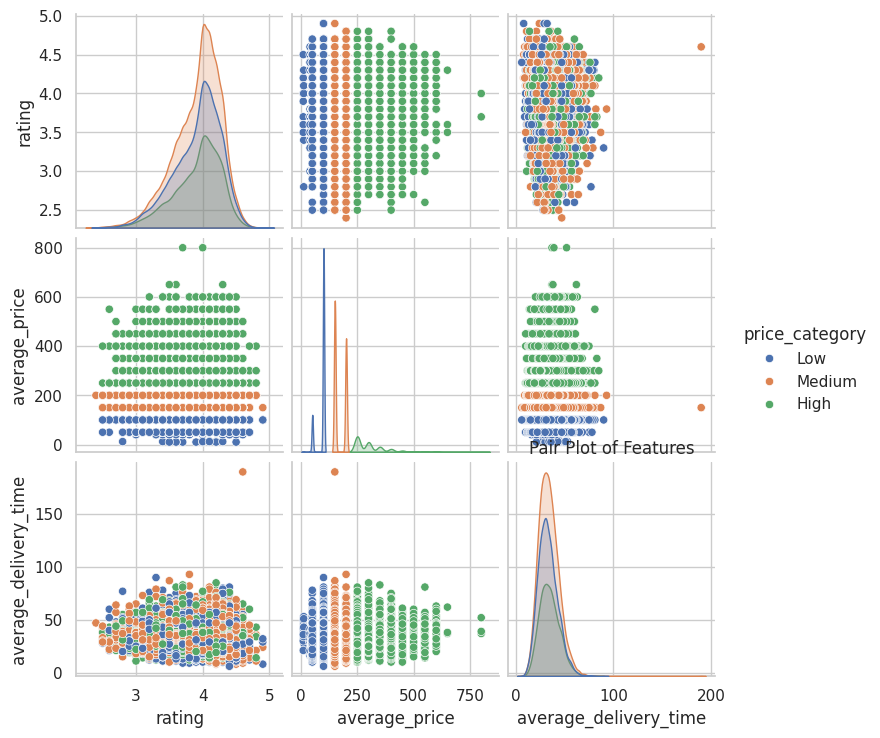

In [ ]:
sns.pairplot(data, vars=['rating', 'average_price', 'average_delivery_time'], hue='price_category')
plt.title('Pair Plot of Features')
plt.show()

####Observations
The pair plot provides the following insights across features (rating, average price, and average delivery time) categorized by price level:

1. Ratings are Consistent Across Price Categories: Ratings are relatively stable across low, medium, and high price categories, with most values clustering around 3.5 to 4.5.

2. Price Category Separation in Average Price: The "average price" feature clearly distinguishes price categories, with low prices clustered at the bottom, medium prices in the middle, and high prices in the upper range.

3. Delivery Time Shows Limited Variation Across Categories: Average delivery times are fairly consistent across price categories, with most values clustering around 30 to 50 minutes, indicating that delivery time is not strongly related to price category.

4. No Strong Correlation Between Features: The scatter plots reveal limited correlation between average price, rating, and delivery time, suggesting that these factors operate independently within this dataset.

## 2.7 ydata-profiling

In [ ]:
# Assuming `data` is your DataFrame
profile = ProfileReport(data, title="EDA Profile Report", explorative=True)

# Save the report to an HTML file (optional)
profile.to_file("eda_report.html")

# Display the report in the Jupyter notebook (optional)
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##2.8 Composite Features

In [ ]:
# Normalizing the columns to ensure similar scales
data['normalized_rating'] = (data['rating'] - data['rating'].min()) / (data['rating'].max() - data['rating'].min())
data['normalized_delivery_time'] = (data['average_delivery_time'] - data['average_delivery_time'].min()) / (data['average_delivery_time'].max() - data['average_delivery_time'].min())

# Creating a composite feature as a weighted sum
data['popularity_score'] = (data['normalized_rating'] * 0.7) + (1 - data['normalized_delivery_time']) * 0.3

# Display the updated DataFrame
data.head()


restaurant_name  rating  average_price  average_delivery_time  \
0          # Momo     4.2            200                     34   
1             #99     4.1            100                     31   
2            #BBQ     3.6            200                     57   
3    #Dilliwaala6     3.7            100                     38   
4        #FlyFree     4.0            200                     26   

   south_indian_or_not  north_indian_or_not  fast_food_or_not  street_food  \
0                    0                    0                 0            0   
1                    0                    0                 0            0   
2                    0                    0                 1            0   
3                    0                    1                 0            1   
4                    0                    0                 1            0   

   biryani_or_not  bakery_or_not    location  average_price_scaled  \
0               0              0    Durgapur              0.301342   
1               0              0    Bareilly             -0.851961   
2               0              0   Mangalore              0.301342   
3               0              0  Puducherry             -0.851961   
4               0              0       Ajmer              0.301342   

   average_delivery_time_scaled  location_encoded  Cuisine Type  \
0                      0.063101        182.885906         other   
1                     -0.233554        170.170886         other   
2                      2.337461        153.319502     fast food   
3                      0.458642        162.983425  north indian   
4                     -0.727980        165.137615     fast food   

  price_category  normalized_rating  normalized_delivery_time  \
0         Medium               0.72                  0.152174   
1            Low               0.68                  0.135870   
2         Medium               0.48                  0.277174   
3            Low               0.52                  0.173913   
4         Medium               0.64                  0.108696   

   popularity_score  
0          0.758348  
1          0.735239  
2          0.552848  
3          0.611826  
4          0.715391

####2.8.1 Cumulative Distribution of Ratings

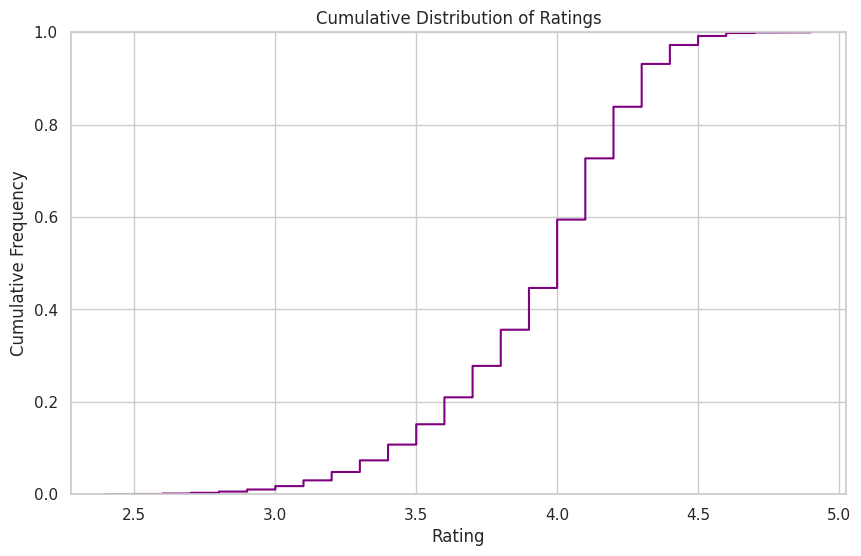

In [ ]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(data['rating'], color='purple')
plt.title('Cumulative Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Cumulative Frequency')
plt.grid(True)
plt.show()


#### 2.8.2 Visualizing Composite Features

In [ ]:
# 1. Price-Delivery Ratio
data['price_delivery_ratio'] = data['average_price'] / (data['average_delivery_time'] + 1)
# Adding 1 to avoid division by zero in case of very low delivery times

# 2. Price-Rating Ratio
data['price_rating_ratio'] = data['average_price'] / (data['rating'] + 0.1)
# Adding a small value (0.1) to prevent division by zero for extremely low ratings

# 3. Cuisine Diversity Score
# Summing up all cuisine binary columns to get a diversity score
cuisine_columns = ['south_indian_or_not', 'north_indian_or_not', 'fast_food_or_not',
                   'street_food', 'biryani_or_not', 'bakery_or_not']
data['cuisine_diversity_score'] = data[cuisine_columns].sum(axis=1)

# Display the updated DataFrame with new composite features
data[['price_delivery_ratio', 'price_rating_ratio', 'cuisine_diversity_score']].head()


price_delivery_ratio  price_rating_ratio  cuisine_diversity_score
0              5.714286           46.511628                        0
1              3.125000           23.809524                        0
2              3.448276           54.054054                        1
3              2.564103           26.315789                        2
4              7.407407           48.780488                        1

####Observations
The composite features provide insights into each restaurant's value and menu variety:

Price-Delivery Ratio: Lower or negative values (e.g., -1.111574) suggest that these restaurants offer faster delivery relative to their price, making them appealing for value-conscious customers. Higher values (e.g., 1.107794) indicate premium pricing relative to delivery time, potentially targeting a more upscale market.

Price-Rating Ratio: Lower or negative values (e.g., -0.224200) show good value in terms of price relative to rating, suggesting that these restaurants offer high ratings for lower prices. This is attractive for customers looking for quality at a reasonable cost.

Cuisine Diversity Score: A score of 0 indicates a single-cuisine focus, appealing to customers looking for a specialized experience, while higher scores (e.g., 1 or 2) indicate multi-cuisine options, which may attract customers or groups seeking menu variety.